The GroudingDINO model isn't working very properly in terms of accuracy for now

Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不到指定的模块。
Could not load the custom kernel for multi-scale deformable attention: DLL load failed while importing MultiScaleDeformableAttention: 找不

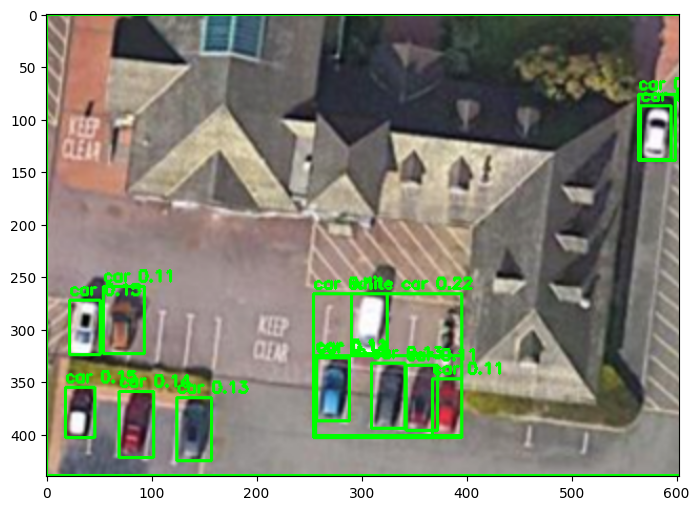

Detected white car with confidence 0.218 at location [290.94, 266.9, 324.18, 323.89]
Detected white car with confidence 0.245 at location [0.07, -0.13, 603.07, 439.87]
Detected car with confidence 0.146 at location [22.25, 272.02, 51.33, 324.39]
Detected car with confidence 0.138 at location [69.02, 359.85, 102.17, 422.77]
Detected car with confidence 0.146 at location [18.44, 355.35, 46.27, 403.99]
Detected car with confidence 0.151 at location [563.57, 76.85, 598.1, 139.99]
Detected car with confidence 0.145 at location [257.91, 327.64, 288.72, 387.08]
Detected car with confidence 0.11 at location [54.04, 259.15, 93.22, 323.84]
Detected car with confidence 0.115 at location [367.01, 347.05, 395.04, 401.38]
Detected car with confidence 0.13 at location [309.74, 332.76, 341.72, 394.49]
Detected car with confidence 0.128 at location [124.6, 365.62, 157.73, 425.54]
Detected car with confidence 0.115 at location [254.59, 266.99, 395.56, 403.26]
Detected car with confidence 0.107 at locati

In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection


model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"


processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)


image_path = r"C:\Users\Jasper\Desktop\Scale_of_Remote-sensing_Images\demo_image_zoomin.png"
image = Image.open(image_path).convert("RGB")


text_labels = ["white car"]


inputs = processor(images=image, text=text_labels, return_tensors="pt").to(device)


with torch.no_grad():
    outputs = model(**inputs)


results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.1,
    text_threshold=0.1,
    target_sizes=[image.size[::-1]]
)


image_cv = np.array(image) 
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)


result = results[0]
for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
    box = [round(x, 2) for x in box.tolist()]
    x1, y1, x2, y2 = map(int, box)

    if score.item() > 0.1:

        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {score.item():.2f}"
        cv2.putText(image_cv, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.show()


for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
    box = [round(x, 2) for x in box.tolist()]
    print(f"Detected {label} with confidence {round(score.item(), 3)} at location {box}")
